---
# <span style="color:green;">HOUSE PRICES - ML MODELS</span></div>

---

### *IBM Data Science Professional Certificate.*
*  Case Study: House Sales in King, Count, USA.
*  Produced by: Luis F. Cisneros
*  Date Produced: 2024.08.19


# 1. INTRODUCTION.

You are a data analyst at a Real-Estate Investment Trust (REIT). The REIT intends to invest in residential real-estate. 


---

#  2. EXECUTIVE SUMMARY.

Management needs a predictive model for data-driven decision-making to generate profits. 

---

# 3. BUISNESS GOAL.

Predict housing prices using these attributes.




#### Predict housing prices using these attributes.

|Variable       | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to the waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when the house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lot size area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


---

# 4. BUSINESS TASK.

* Import the required libraries in Python for data management, visualization, and machine learning assistance.

* Identify the source of the data.

* Create a data frame for training and testing purposes.

* Verify that the data downloaded as intended.

* Perform data wrangling techniques on the data.

* Perform exploratory analysis on the data.

* Create a machine learning-assisted model to make purchase and sale decisions based on data.

* Evaluate and Refine the model.

---


# 5. KEY STAKEHOLDERS

* The REIT's Executives

* Investors
  

---

# 5. METHODOLOGIES.

To determin the market price of a house given a set of features for square footage, number of bedrooms, and floors (etc.), a dataset is analyzed for correlation. 

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
print("Warnings are --> surpresse.")


Warnings are --> surpresse.


### 5.1. Import data management libraries.

*  Data.
  
*  Visuals.

*  Machine learning.


In [2]:
# For data manipulation
import pandas as pd 

# For data visualization
import matplotlib.pyplot as plt

# For managing arrays of data
import numpy as np

# Machin learning Libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
%matplotlib inline

# Notify when done.
print("Done importing libraries!")

Done importing libraries!


### 5.2. Import web managment libraries.

In [3]:
# Web management tool - seaborn
import piplite
await piplite.install('seaborn')
import seaborn as sns
%matplotlib inline

# Notify when done.
print("Done importing web managment tools.")

Done importing web managment tools.


### 5.2. Import HTTP request manager.

In [4]:
#Compile python to Webassembly as pyodide.
from pyodide.http import pyfetch


# Sends HTTP Get Request to the specified url
async def download(url, filename):  # The URL of file to be downloaded  ; file name of the file to be saved
    response = await pyfetch(url)  # Send Ping
    if response.status == 200:     # If status is 200, then OK.
        with open(filename, "wb") as f:  # Script to close the file after it is read.
            f.write(await response.bytes()) # Allows time for script to compile

# Notify when done.
print("Web assembler pyfetch imported.")

Web assembler pyfetch imported.


### 5.3. Identify the data.

---

#### 5.3.1. Kaggle Dataset for House Sales in King Country, USA.: 

*  Select [(Kaggle.com/datasets)](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?select=kc_house_data.csv).

*  Download the CSV file to your computer or your Juypter account.


---

  

### 5.4. Define the data frame.


In [5]:
# Load the CSV file

df =pd.read_csv('housing.csv')

# View a sample of "df"
print(df.head())

   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

#### Save the data as a CSV file.

In [7]:
# Instruct the computer to allow time for data to arrive
file_name = "housing.csv"
print("file saved")

file saved



---

### 5.5. Verify the download.

---

In [8]:
# Verify that file downloaded by with the print function. 
print("The name of the file is:", file_name)


The name of the file is: housing.csv


---

##### 5.5.1. View a sample data.

In [9]:
# View the first five rows of the dataframe.

print(" [THE HEAD FUNCTION. ]")
df.head()

 [THE HEAD FUNCTION. ]


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---

##### 5.5.2. Data types of the columns.

In [10]:
print("[ DATA TYPES BY COLUMN. ]")
print(df.dtypes)

[ DATA TYPES BY COLUMN. ]
Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


---
  
#####  5.5.3. Statistical Summary - Describe Method

In [11]:
# Statistical Summary - Describe methode

print("[ STATISTICAL SUMMARY.]")
df.describe()

[ STATISTICAL SUMMARY.]


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



---

### 5.6. Data Wrangling.

---

#####    5.6.1.   Remove columns: "id" & "Unnamed: 0"


In [12]:
# Drop columns

df = df.drop(['id', 'Unnamed: 0'], axis=1, errors='ignore')
print("Columns are dropped.")

Columns are dropped.


In [13]:
# To see if columns dropped.

print("[ THE HEAD FUNCTION. ]")
print("[ Review the columns and verify that columns for id and Unammed:_0 are removed. ]")
df.head()

[ THE HEAD FUNCTION. ]
[ Review the columns and verify that columns for id and Unammed:_0 are removed. ]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---

#####    5.6.2. View a statistical summary with the describe method.

In [14]:
# View statistical summary.

print("[STATISTICAL SUMMARY.]")
print("[The describe methode.]")
df.describe()


[STATISTICAL SUMMARY.]
[The describe methode.]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### 5.6.3. Identify missing values.


`To view the null values.`

In [15]:
# View null values for bedrooms.

print("[BEDROOMS] - number of NaN values:", df['bedrooms'].isnull().sum())

# View null values for bathrooms.
print("[BATHROOMS] - number of NaN values:", df['bathrooms'].isnull().sum())

[BEDROOMS] - number of NaN values: 13
[BATHROOMS] - number of NaN values: 10


---

#### 5.6.7. Normalize the data. 

To normalize the data, replace missing values witht he mean.


`Bedrooms` - Replace missing values with MEAN 

In [17]:
# Create mean to replace NaN Values for bedrooms.
mean=df['bedrooms'].mean()

# Replace function for NaN values.
df['bedrooms'].replace(np.nan,mean, inplace=True)

# View the number of null values for bedrooms.
print(" [ BEDROOM ] number of NaN values :", df['bedrooms'].isnull().sum())

 [ BEDROOM ] number of NaN values : 0


---

`Bathroom` - Replace missing values with the MEAN 

In [18]:
# Create mean to replace NaN Values for bathroom.
mean=df['bathrooms'].mean()

# Replace function for Nan Values.
df['bathrooms'].replace(np.nan,mean, inplace=True)

# View the number of null values for bathrooms.
print(" [ BATHROOM ] number of NaN values:", df['bathrooms'].isnull().sum())

 [ BATHROOM ] number of NaN values: 0


---

### 5.7. Exploratory Data Analysis


---

#### 5.7.1 Count the houses with unique floor values
    Use the method .to_frame() to convert it to a dataframe

In [26]:
# Count the number of houses with unique floor values.
floor_counts = df['floors'].value_counts().to_frame()

# Rename the columns for clarity (optional).
floor_counts.columns = ['Number of Houses']

# Display the result
print("         [FLOOR COUNT]")

print(floor_counts)

         [FLOOR COUNT]
        Number of Houses
floors                  
1.0                10680
2.0                 8241
1.5                 1910
3.0                  613
2.5                  161
3.5                    8


---

#### 5.7.2. Create visual (boxplot) to identify outliers.


[ BOX PLOT ]


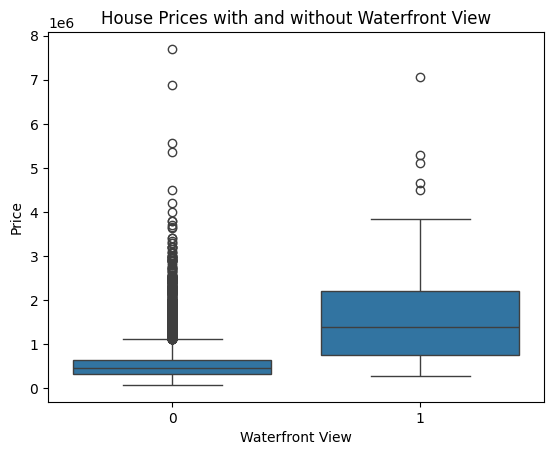

In [29]:
# Create the boxplot
sns.boxplot(x='waterfront', y='price', data=df)

# Add labels and title for clarity.
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('House Prices with and without Waterfront View')

# Display the plot.
print("[ BOX PLOT ]")
plt.show()

---

#### 5.7.3. Determin correlation between feature `sq_above` and price.

[ Regression Plot ]


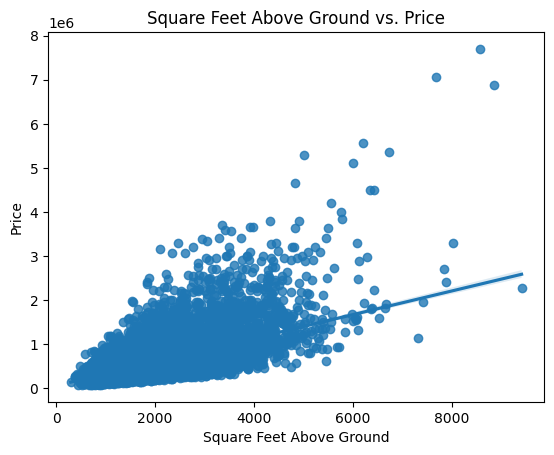

In [31]:
# Create the scatterplot with a regression line.
sns.regplot(x='sqft_above', y='price', data=df)

# Add labels and title for clarity.
plt.xlabel('Square Feet Above Ground')
plt.ylabel('Price')
plt.title('Square Feet Above Ground vs. Price')

# Display the plot.
print("[ Regression Plot ]")
plt.show()

---

#### 5.7.4. Use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [36]:
# Select only numeric columns.
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix.
correlation_matrix = numeric_df.corr()

# Sort the correlations with respect to 'price'.
sorted_correlations = correlation_matrix['price'].sort_values()

# Display the pearson correlations.

print("[ PANDAS METHODE CORR() FOR R^2 VALUES]")
print("---------------------------------------")
print(sorted_correlations)

[ PANDAS METHODE CORR() FOR R^2 VALUES]
---------------------------------------
zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


In [48]:
# Define the Feature: Longitude.
X = df[['long']]

# Define the Target: Price.
Y = df['price']

# Define the model.
lm = LinearRegression()

#Train the model.
lm.fit(X,Y)

#Calculates the R^2 values. 
R_Longitude=lm.score(X, Y)
print("R^2 Value for [Longitude] and [Price]:",R_Longitude)

R^2 Value for [Longitude] and [Price]: 0.00046769430149007363


---

#### 5.7.4. Predict `price` with feature `sqft_living`. Then calcuate R^2.


In [47]:
# Define the feature and target.
X = df[['sqft_living']]  # Feature: sqft_living
y = df['price']   # Target: price.

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model.
model = LinearRegression()

# Fit the model on the training data.
model.fit(X_train, y_train)

# Predict on the test set.
y_pred = model.predict(X_test)

# Calculate the R^2 value.
r2 = r2_score(y_test, y_pred)

# Display the R^2 value.
print(f"R^2 Value for [sqft_living] and [price]: {r2}")

R^2 Value for [sqft_living] and [price]: 0.4940690538908905


---

#### 5.7.5. Fit a linear regression model to predict the [price] using the list of features in the code below:

In [45]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [49]:
X=df[features]
Y=df['price']
lm=LinearRegression()
lm
lm.fit(X,Y)
print("R^2 value for [ price ] and  [features] = ",lm.score(X, Y))


R^2 value for [ price ] and  [features] =  0.6576890354915759


    CALCULATE R^2:

    THE ESTIMATORS

---
#### Tuples.
Create tuples, the first element in the tuple contains the name of the estimator:

   * 'scale'

   * 'polynomial'

   * 'model'

The second element in the tuple contains the model constructor

* StandardScaler()

* PolynomialFeatures(include_bias=False)

* LinearRegression()


    CORRELATION BETWEEN PRICE AND ESTIMATORS
    

In [52]:
# Create the tuples.

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

print("The variables for the pieple line are stated.")

The variables for the pieple line are stated.


In [53]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [54]:
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [56]:
print("Score:",pipe.score(X,Y))

Score: 0.7512051345272872


In [59]:
# Import the modules

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print(" MODEL SELECTED : [cross_val_score] and [ train_test_split]")

 MODEL SELECTED : [cross_val_score] and [ train_test_split]


In [62]:
# we will split the data into training and testing data

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 

X = df[features ]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("Test samples qty:", x_test.shape[0])


print("Training samples qty:",x_train.shape[0])

Test samples qty: 3242
Training samples qty: 18371


---

### 5.8.  Model Evaluation and Refinement.


---


#### 5.8.1. Split the data set into for testing and training.

In [65]:
# List of features.
features = ["floors", "waterfront",  "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
           ]

# Define the Feature.
X = df[features]

# Define the Target.
Y = df['price']

# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Print the number of samples in each set
print("[SPLIT THE DATA FOR TRAINING AND TESTING ]")
print("Test samples qty:", x_test.shape[0])
print("Training samples qty:", x_train.shape[0])

[SPLIT THE DATA FOR TRAINING AND TESTING ]
Test samples qty: 3242
Training samples qty: 18371


---

#### 5.8.2 Ridge Model 

Ridge models are used when the data set has more predictor variables than oberservations, or when militcollinaearity is present in a set.

In [77]:
# Import ridge model.
from sklearn.linear_model import Ridge
print("Ridge Model from sklearn imported!")

Ridge Model from sklearn imported!


In [75]:
# Create the Ridge regression model with regularization parameter alpha=0.1.
ridge_model = Ridge(alpha=0.1)

# Fit the model on the training data.
ridge_model.fit(x_train, y_train)

# Predict on the test set.
y_pred_ridge = ridge_model.predict(x_test)

# Calculate the R^2 value for the Ridge regression model.
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the R^2 value for the Ridge regression model.
print("[RIDGE MODEL]")
print("R^2 value for trained dataset:",r2_ridge)




[RIDGE MODEL]
R^2 value for trained dataset: 0.647875916393907


---

#### 5.8.3. Second Order Polynomial Ridge Regression (parameter to 0.1) .

In [82]:
# Perform a second-order polynomial transform on the features.
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the training and testing data.
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Create the Ridge regression model with regularization parameter alpha=0.1.
ridge_model_poly = Ridge(alpha=0.1)

# Fit the model on the polynomial transformed training data.
ridge_model_poly.fit(X_train_poly, y_train)

# Predict on the polynomial transformed test set.
y_pred_poly_ridge = ridge_model_poly.predict(X_test_poly)

# Calculate the R² value for the Ridge regression model with polynomial features.
r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)

# Display the R² value for the Ridge regression model with polynomial features.
print("[SECOND ORDER POLYNOMIAL RIDGE REGRESSION]")
print( "R^2 value for trained dataset:",r2_poly_ridge)

[SECOND ORDER POLYNOMIAL RIDGE REGRESSION]
R^2 value for trained dataset: 0.700274425803224


# 7. CONCLUSION.

 The model with the **most significant correlation** is the **Second Order Polynomial Ridge Regression** with an `R^2 value of 0.70.`